In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\my files\Kaggle Data\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
! pip install scipy

In [36]:
df.shape

(200, 5)

In [37]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
df.drop("CustomerID",inplace=True,axis=1)

In [40]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<AxesSubplot:xlabel='Genre', ylabel='count'>

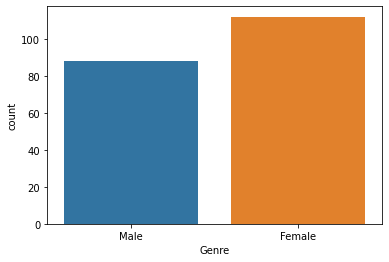

In [41]:
sns.countplot(x="Genre",data=df)

In [44]:
df["Genre"]=df["Genre"].astype("category")
df["Genre"]=df["Genre"].cat.codes
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [45]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df)
df_scaled

array([[0.02178034, 0.4138265 , 0.32670513, 0.84943334],
       [0.01176226, 0.24700755, 0.17643396, 0.9527434 ],
       [0.        , 0.76028592, 0.60822874, 0.22808578],
       [0.        , 0.28069661, 0.19526721, 0.93972343],
       [0.        , 0.5806832 , 0.31843918, 0.74926865],
       [0.        , 0.27185366, 0.21006874, 0.93913083],
       [0.        , 0.87913063, 0.45212432, 0.15070811],
       [0.        , 0.23366214, 0.18286603, 0.95496702],
       [0.01496208, 0.95757323, 0.28427955, 0.04488625],
       [0.        , 0.37368855, 0.23666942, 0.89685253],
       [0.01407613, 0.94310088, 0.26744652, 0.19706586],
       [0.        , 0.3279921 , 0.17805285, 0.92774908],
       [0.        , 0.91832409, 0.31666348, 0.23749761],
       [0.        , 0.28882142, 0.24068452, 0.92663539],
       [0.02270968, 0.84025832, 0.45419368, 0.29522589],
       [0.01184615, 0.26061522, 0.23692293, 0.93584556],
       [0.        , 0.65094455, 0.39056673, 0.65094455],
       [0.01387017, 0.27740345,

In [47]:
col_names = ["Genre","Age","Annual Income (k$)","Spending Score (1-100)"]
df = pd.DataFrame(df_scaled,columns=col_names)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.021780,0.413826,0.326705,0.849433
1,0.011762,0.247008,0.176434,0.952743
2,0.000000,0.760286,0.608229,0.228086
3,0.000000,0.280697,0.195267,0.939723
4,0.000000,0.580683,0.318439,0.749269


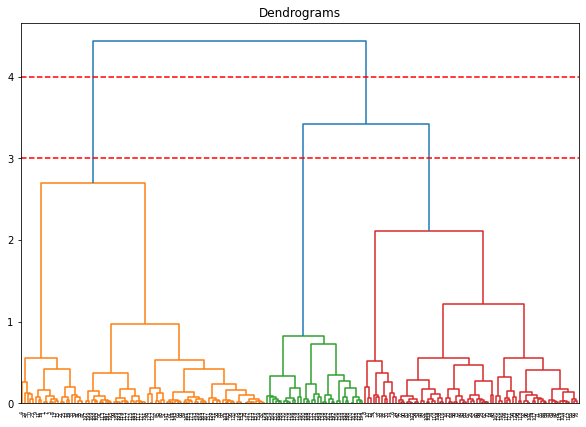

In [50]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(df,method="ward"))
plt.axhline(y=3,color="red",linestyle="--")
plt.axhline(y=4,color="red",linestyle="--")
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3)
group = cluster.fit_predict(df)
group

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [52]:
df["cluster"]=group
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0.021780,0.413826,0.326705,0.849433,0
1,0.011762,0.247008,0.176434,0.952743,0
2,0.000000,0.760286,0.608229,0.228086,1
3,0.000000,0.280697,0.195267,0.939723,0
4,0.000000,0.580683,0.318439,0.749269,0


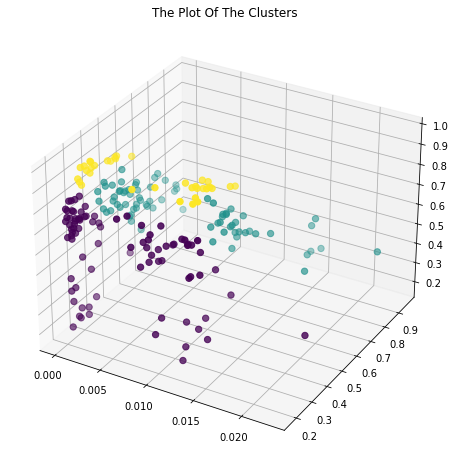

In [57]:
x = df["Genre"]
y = df["Age"]
z = df["Annual Income (k$)"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df["cluster"], marker='o', cmap = "viridis" )
ax.set_title("The Plot Of The Clusters")
plt.show()

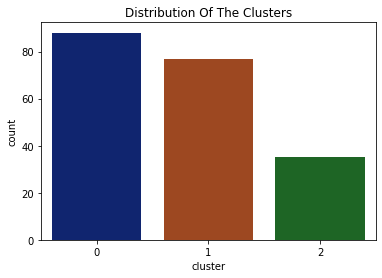

In [58]:
sns.set_palette("dark")
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

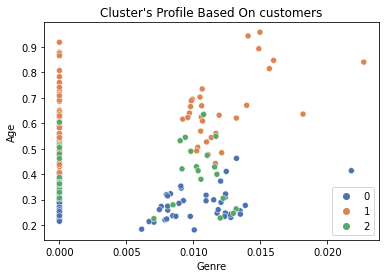

In [60]:
pl = sns.scatterplot(data = df,x=df["Genre"], y=df["Age"],hue=df["cluster"],palette="deep")
pl.set_title("Cluster's Profile Based On customers")
plt.legend()
plt.show()

In [61]:
group1 = df[group==0]
group1.to_csv("g1.csv")

In [62]:
group2 = df[group==1]
group2.to_csv("g2.csv")

In [63]:
group3 = df[group==2]
group3.to_csv("g3.csv")